1. 소개
2. 질문은 언제든지 환영
3. 코드 소개, 실습 위주로 진행할 것. 실습을 위해 필요한 부분을 상기해가면서...
4. MNIST tutorial 해보신 분?
5. 여기서는 tf.nn 위주로, tf.layers는 다음 시간에 소개할 것

In [1]:
# Enter an interactive TensorFlow Session.
import tensorflow as tf
sess = tf.InteractiveSession()

# Padding

데이터의 맨 가장자리에도 Convolution/Pooling Filter를 적용하기 위해 덧붙이는 가짜 데이터

맨 끝 데이터를 카피하거나, 미러링하거나, 혹은 0 값을 적용

# Striding

Filter를 적용하는 간격

Convolutional/Pooling layer에 적용

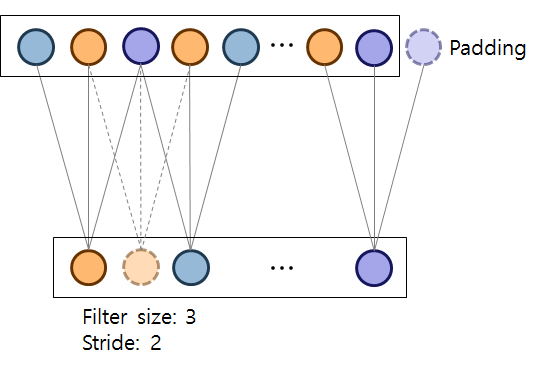

# 1. Convolutional layer 구성

1) weight, bias 변수 선언

2) weight를 convolutional layer 선언하기

3) bias를 더해주기

4) non-linear activation function 덧붙이기

# 1) weights/biases 선언 (tf.Variable)

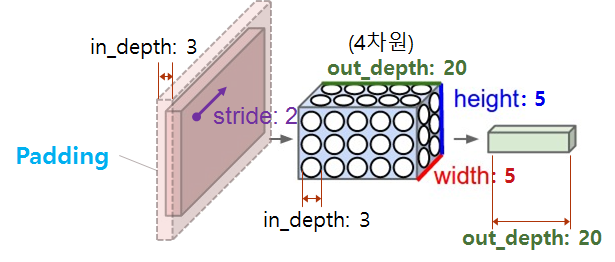

tf.Variable(
    initial_value,
    trainable=True,
    collections=None,
    validate_shape=True,
    caching_device=None,
    name=None,
    variable_def=None,
    dtype=None,
    expected_shape=None,
    import_scope=None
)

1. Convolutional layer를 구성하고 있는 weight를 먼저 선언해야 한다.
2. filter의 4차원 그림 (보통은 3차원으로 많이 그린다.)
3. Convolution 연산은 한 shift당 곱하고, 더해서, 하나의 값이 나온다.
4. input depth와 output depth를 결정하는 방법
5. padding 옵션: VALID, SAME
6. stride: kernel size 줄이기

In [2]:
conv1_weights = tf.Variable([0])
conv1_weights = tf.Variable(tf.zeros([5,5],dtype=tf.float32))
conv1_weights = tf.Variable(tf.truncated_normal([5, 5, 3, 20], stddev=0.1, dtype=tf.float32))

In [3]:
conv1_biases = tf.Variable(tf.zeros([20],dtype=tf.float32))

<연습문제>
1. convx_weight를 선언해보자. (kernel 3x3, indepth 20, depth 30, truncated_normal 분포)
2. tf.constant(value, shape=[], dtype=...)을 써서, convx_bias를 선언해보자. (상수 0.1로 초기화, depth 30)
3. tf.ones를 써서, convx_bias2를 선언해보자. (상수 1로 초기화, depth 100)

# 2) Conv layer 선언 (tf.nn.conv2d, tf.nn.bias_add)

한 층에서 동시에 여러 개의 filter를 적용 --> filter가 depth를 가진다.
    - 3채널 이미지 1장에 대해서,
        3D feature map * 3D filter --> 2D feature map
        3D feature map (indepth) * 4D filter (height,width,indepth,outdepth) --> 3D feature map (_,_,outdepth)
    - 3채널 이미지 여러장에 대해서,
        4D (batch,_,_,indepth) * 4D filter (height,width,indepth,outdepth) --> 4D feature map (batch,_,_,outdepth)
    
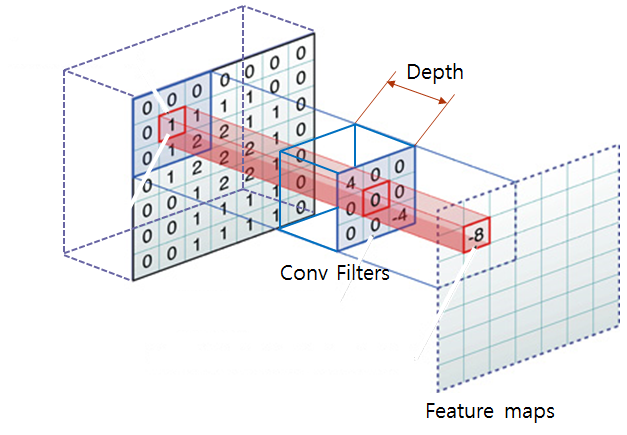

1. 일단 여기서는, tf.nn을 이용한다. (tf.layers, slim, keras)

tf.nn.conv2d(
    input,
    filter,
    strides,
    padding,
    use_cudnn_on_gpu=None,
    data_format=None,
    name=None
)

참조: https://www.tensorflow.org/api_docs/python/tf/nn (API 버전에 유의!)

In [4]:
x = tf.placeholder(tf.float32, [None, 32, 32, 3])

In [5]:
net = tf.nn.conv2d(x, conv1_weights, [1, 2, 2, 1], padding='SAME', name='conv1')
net

<tf.Tensor 'conv1:0' shape=(?, 16, 16, 20) dtype=float32>

In [6]:
net = tf.nn.bias_add(net, conv1_biases)
net

<tf.Tensor 'BiasAdd:0' shape=(?, 16, 16, 20) dtype=float32>

<연습문제>
1. 앞서 선언한 convx_weight, convx_bias를 써서 conv layer netx를 선언해보자. (strides 2, padding 'SAME')
2. netx의 padding을 'VALID'로 바꾸고 결과 텐서가 어떻게 변화하는지 살펴보자.
3. netx에서 convx_bias 대신 convx_bias2를 써서, 어떤 에러가 발생하는지 살펴보자.

# 3) Activation functions (tf.nn.tanh)
    - tf.sigmoid
    - tf.tanh
    - tf.nn.relu
    
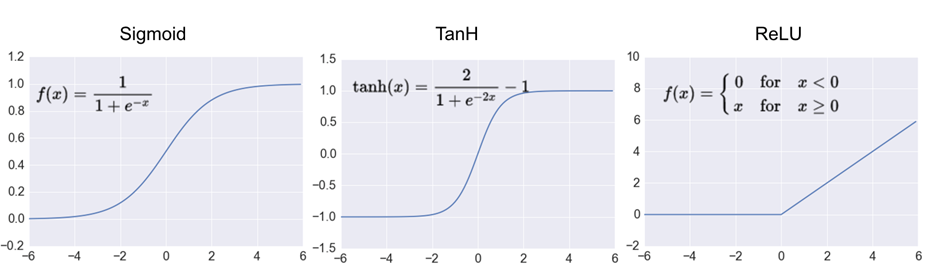

In [7]:
net = tf.nn.tanh(net)
net

<tf.Tensor 'Tanh:0' shape=(?, 16, 16, 20) dtype=float32>

<연습문제>
1. Sigmoid나 ReLU를 써서, netx를 선언해보자.

# 2. Pooling layer (tf.nn.max_pool)

윈도우 내에서 가장 큰 값만 골라서 다음 feature map을 구성하는 연산
    - Feature map의 크기를 줄임
    - 이동, 변형에 강인한 인식 능력
    - 학습할 자유 패러미터는 없음
    
pooling layer는 간단히, kernel 크기, stride 폭만 정하면 됨

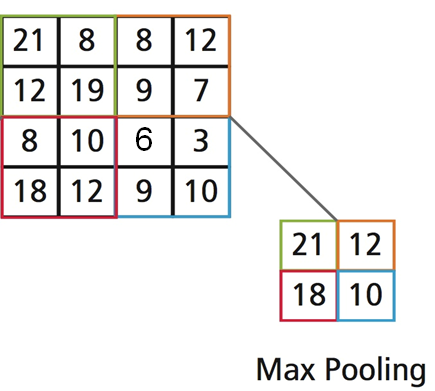

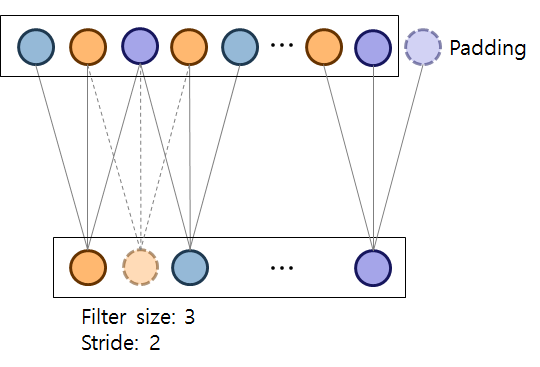

In [1]:
"VALID" = without padding:
   inputs:         1  2  3  4  5  6  7  8  9  10 11 (12 13)
                  |________________|                dropped
                                 |_________________|
"SAME" = with zero padding:
               pad|                                      |pad
   inputs:      0 |1  2  3  4  5  6  7  8  9  10 11 12 13|0  0
               |________________|
                              |_________________|
                                             |________________|

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 7)

tf.nn.max_pool(
    value,
    ksize,
    strides,
    padding,
    data_format='NHWC',
    name=None
)

In [8]:
net = tf.nn.max_pool(net, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME', name='pool1')
net

<연습문제>
1. max pooling layer netx를 선언해보자. (kernel 3, stride 2)
2. padding을 'VALID'로 바꾸고, 결과 텐서가 어떻게 변화하는지 살펴보자.

<tf.Tensor 'MaxPool_5:0' shape=(?, 4, 4, 20) dtype=float32>

# 3. Fully connected layer

0) fully connected layer를 적용하기 위해서는 우선 1차원으로 만들어줘야 한다. [batch 크기, ]

1) tf.nn에는 fully connected layer 연산이 따로 없고, matrix 곱셈을 이용해서 구현한다.

# 0) Flatten 하기 (tf.reshape)

tf.reshape(
    tensor,
    shape,
    name=None
)

1. 차원에 [-1, ...]은 나머지 패러미터에 맞춰서 차원을 조절하겠다는 뜻

In [11]:
net = tf.reshape(net,[-1,8*8*20])

In [12]:
net

<tf.Tensor 'Reshape_1:0' shape=(?, 1280) dtype=float32>

<연습문제>
1. netx = tf.reshape(net, [-1, '여기에 다양한 값을 시도해보면서 결과 텐서가 어떻게 바뀌는지 살펴보자.'])

# 1) tf.matmul

tf.matmul(
    a,
    b,
    transpose_a=False,
    transpose_b=False,
    adjoint_a=False,
    adjoint_b=False,
    a_is_sparse=False,
    b_is_sparse=False,
    name=None
)

In [13]:
fc1_weights = tf.Variable(tf.truncated_normal([1280, 256], stddev=0.1, dtype=tf.float32))
fc1_biases = tf.Variable(tf.constant(0.1, shape=[256], dtype=tf.float32))

In [14]:
net = tf.nn.tanh(tf.matmul(net, fc1_weights) + fc1_biases)

In [15]:
net

<tf.Tensor 'Tanh_1:0' shape=(?, 256) dtype=float32>

In [16]:
fc2_weights = tf.Variable(tf.truncated_normal([256, 10], stddev=0.1, dtype=tf.float32))
fc2_biases = tf.Variable(tf.ones([10], dtype=tf.float32))

In [17]:
logits = tf.nn.tanh(tf.matmul(net, fc2_weights) + fc2_biases)
logits

<tf.Tensor 'Tanh_2:0' shape=(?, 10) dtype=float32>

1. 모델 구성은 끝났습니다. 이제 학습을 시켜야겠죠?

학습을 시키기 위해서는 크게 4가지 작업을 해줘야 합니다.

- graph에 loss 추가하기
- graph에 prediction 추가하기 (+ 에러율 계산하기)
- optimizer 추가하기 (learning rate 업데이트)
- session 선언 및 training loop 돌리기

# 4. training을 위해서 graph에 loss와 prediction 추가

In [18]:
# placeholder for labels
y = tf.placeholder(tf.int32, [None,])

tf.reduce_mean(
    input_tensor,
    axis=None,
    keep_dims=False,
    name=None,
    reduction_indices=None
)

tf.nn.sparse_softmax_cross_entropy_with_logits(
    _sentinel=None,
    labels=None,
    logits=None,
    name=None
)

In [ ]:
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits))
loss

tf.nn.softmax(
    logits,
    dim=-1,
    name=None
)

In [ ]:
prediction = tf.nn.softmax(logits)
prediction

아래와 같이 L2 regularization을 loss에 추가해줄 수도 있다.

tf.nn.l2_loss(
    t,
    name=None
)

In [1]:
regularizers = (tf.nn.l2_loss(fc1_weights) + tf.nn.l2_loss(fc2_weights))
loss += 5e-4 * regularizers

NameError: name 'tf' is not defined

# 5. 에러율(정확도)의 계산

- sess.run()을 통해서 넘겨받은 값은 numpy array, numpy array 상태로 많이 계산한다.

In [ ]:
# predictions = sess.run([prediction, ...], ...)
# predictions = [batch, 10]
# labels = [batch, ]

def error_rate(predictions, labels):
  """Return the error rate based on dense predictions and sparse labels."""
  return 100.0 * (1.0 - numpy.sum(numpy.argmax(predictions, 1) == labels) / predictions.shape[0])

- tensorflow graph에서 mini-batch 단위로 계산하기도 한다.

tf.argmax(
    input,
    axis=None,
    name=None,
    dimension=None,
    output_type=tf.int64
)

tf.equal(
    x,
    y,
    name=None
)

tf.cast(
    x,
    dtype,
    name=None
)

tf.reduce_mean(
    input_tensor,
    axis=None,
    keep_dims=False,
    name=None,
    reduction_indices=None
)

In [ ]:
with tf.name_scope("accuracy"):
  correct_pred = tf.equal(tf.argmax(prediction, 1), y)
  accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# 6. learning rate와 optimizer

tf.train.exponential_decay(
    learning_rate,
    global_step,
    decay_steps,
    decay_rate,
    staircase=False,
    name=None
)

다양한 decay 함수: https://www.tensorflow.org/api_guides/python/train#Decaying_the_learning_rate

In [ ]:
BATCH_SIZE = 100
TRAIN_SIZE = 55000
# set up a variable that's incremented once per batch and controls the learning rate decay.
batch = tf.Variable(0, dtype=tf.float32, name='global_step')
# Decay once per epoch, using an exponential schedule starting at 0.1.
learning_rate = tf.train.exponential_decay(
                                  learning_rate = 0.01,                # Base learning rate.
                                  global_step = batch * BATCH_SIZE,  # Current index into the dataset.
                                  decay_steps = TRAIN_SIZE,          # Decay step.
                                  decay_rate = 0.95,                # Decay rate.
                                  staircase=True)

In [ ]:
#batch = batch + 1
#tf.global_variables_initializer().run()
#batch.eval()

다양한 optimizer 클래스: https://www.tensorflow.org/api_guides/python/train#Optimizers

In [ ]:
# Use simple sgd for the optimization.
"""
minimize(
    loss,
    global_step=None,
    var_list=None,
    gate_gradients=GATE_OP,
    aggregation_method=None,
    colocate_gradients_with_ops=False,
    name=None,
    grad_loss=None
)
* loss: A Tensor containing the value to minimize.
* global_step: Optional Variable to increment by one after the variables have been updated.
* var_list: Optional list or tuple of Variable objects to update to minimize loss. Defaults to the list of variables collected in the graph under the key GraphKeys.TRAINABLE_VARIABLES.
"""
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=batch)

# 7. Session 선언하기, training loop 돌리기

In [ ]:
with tf.Session(config=tf.ConfigProto(allow_soft_placement=True, gpu_options={'allow_growth':True})) as sess:
  # Run all the initializers to prepare the trainable parameters.
    tf.global_variables_initializer().run()
    
    # 한 epoch의 step 수
    steps_per_epoch = 10
    
    for step in range(steps_per_epoch):
        ### mini-batch 데이터 로드,
        # batch_data = ...
        # batch_labels = ...
        
        feed_dict = {x: batch_data,
                     y: batch_labels}
        
        sess.run(optimizer, feed_dict=feed_dict)        
    
    # training이 끝나면 test data에 대해서도 마찬가지로 feed_dict를 구성하고, sess.run을 하고, 결과를 받아서 error_rate를 구한다.
    feed_dict = {x: test_data}
    test_predictions = sess.run([prediction],feed_dict=feed_dict)[0]
    test_error = error_rate(test_predictions, test_labels)